In [1]:
import numpy as np
import networkx as nx
import random
import copy

from AntColony import *

In [2]:
#coordinates, request, capasity = readCSV("./../data/uchoa/X-n143-k7.xml")
coordinates, request, capasity = readCSV("./../data/augerat/A-n32-k05.xml")

In [3]:
def pos_from_coordinates(coordinates):
    pos = {}
    for i in range(len(coordinates)):
        pos[i] = coordinates[i]
    return pos

def plot_solution(antColony, labels = False):
    M = antColony.problem_size
    P = [None] * M
    P[0] = "blue"
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(M)]
    
    i = 0
    for node in antColony.best_path:
        if node == 0:
            i += 1
        else:
            P[node] = color[i-1]

    G=nx.Graph()
    G.add_edges_from([(i, j) for i in range(M) for j in range(M) if i != j])
    
    labeldict = {}
    if labels:
        for node in np.arange(M):
            labeldict[node] = str(int(antColony.request[node]))
    
    pos = pos_from_coordinates(antColony.coordinates)
    fig1 = nx.draw_networkx(G, pos = pos, node_color=P, labels=labeldict,
                            edgelist = [(antColony.best_path[i], antColony.best_path[i+1]) for i in range(len(antColony.best_path)-1)],
                            with_labels=True)
    print("Optimization with {}: iterations = {}, cost = {:.3f}, trucks = {}".format(antColony.name, antColony.iters_done, antColony.best_cost, antColony.best_number_of_cycles))

In [4]:
antColony = AntColony_Reduced(number_of_ants=None, alpha=1, beta=1, starting_pheromone = 0.005, Q = 1, print_warnings=True)

In [5]:
antColony.set_problem(coordinates, request, capasity, 10000, 5)

Adding 0 as technical request for warehouse


In [6]:
antColony.optimize(max_iter=1000, print_progress=True, restart=True, max_time=5)

New best solution in 0 iteration: cost = 1114.985 and uses 7 trucks
New best solution in 2 iteration: cost = 1088.398 and uses 7 trucks
New best solution in 5 iteration: cost = 1075.587 and uses 8 trucks
New best solution in 11 iteration: cost = 1062.092 and uses 8 trucks
New best solution in 26 iteration: cost = 1027.660 and uses 8 trucks
Time for optimization has passed on 28th iteration


Optimization with Reduced: iterations = 28, cost = 1027.660, trucks = 8


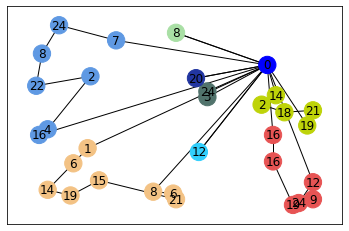

In [7]:
plot_solution(antColony, True)

Iterations = 137, cost = 1043.882, trucks = 9


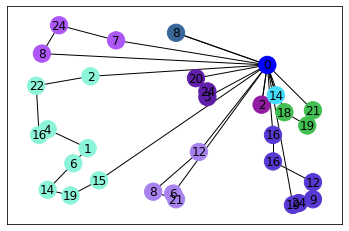

In [11]:
plot_solution(antColony, True)

Iterations = 137, cost = 1043.882, trucks = 9


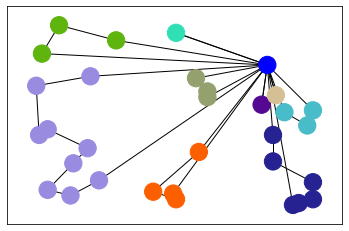

In [13]:
plot_solution(antColony)

In [8]:
greedy = Greedy(True)

In [9]:
greedy.set_problem(coordinates, request, capasity, 10000, 5)

Adding 0 as technical request for warehouse


In [10]:
greedy.optimize()

Optimization with Greedy: iterations = None, cost = 1146.400, trucks = 5


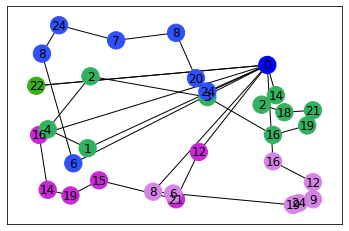

In [11]:
plot_solution(greedy, True)